In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st
import seaborn as sns

In [2]:
# Read the CSV
bank_data = pd.read_csv("bank_churners.csv")
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
# drop any columns of the data that we will not need or investigate. - Drop last columns.
bank_data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], inplace=True)
bank_data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [5]:
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


**Question 1: Comparing age and gender to the number of existing and attrited customers?**


In [91]:
# identifying the columns needed to answer this question
q1_columns = ["Gender", "Attrition_Flag", "Customer_Age"]
# establishing the dataset by adding the columns we needed
card_df = bank_data[q1_columns]
# visualising dataset
card_df

,Gender,Attrition_Flag,Customer_Age
0,M,Existing Customer,45
1,F,Existing Customer,49
2,M,Existing Customer,51
3,F,Existing Customer,40
4,M,Existing Customer,40
...,...,...,...
10122,M,Existing Customer,50
10123,M,Attrited Customer,41
10124,F,Attrited Customer,44
10125,M,Attrited Customer,30


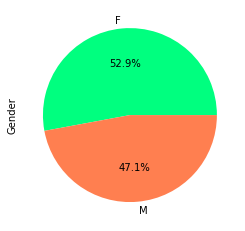

In [7]:
# visualise the genders within the data

pie_plot = card_df.groupby(["Gender"])["Gender"].count()
pie_plot.plot(kind="pie", y="Gender", autopct="%1.1f%%", colors = ["springgreen", "coral"])

The above pie chart shows the percentage of males and females within the dataset.

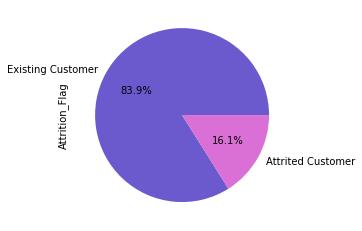

In [8]:
# visualise the number of existing and attrited customers

card_df["Attrition_Flag"].value_counts().plot(kind="pie", y="Attrition_Flag", autopct="%1.1f%%", colors=["slateblue", "orchid"])

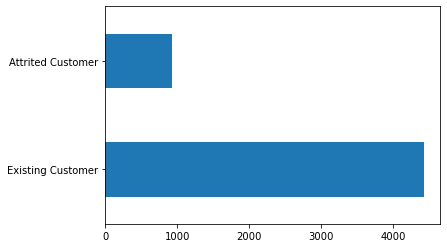

In [33]:
# using .loc to separate the data into male and female

female = card_df.loc[card_df["Gender"] == "F"]
male = card_df.loc[card_df["Gender"] == "M"]

#using value_counts to view the number of existing and attrited customers for each gender

female["Attrition_Flag"].value_counts().plot(kind="barh")

This data shows that there are 4428 existing female customers and 930 attrited female customers.

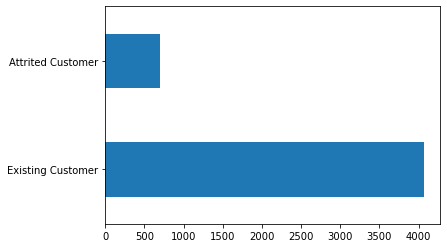

In [31]:
male["Attrition_Flag"].value_counts().plot(kind="barh")

This data shows that there are 4072 existing male customers and 697 attrited male customers.

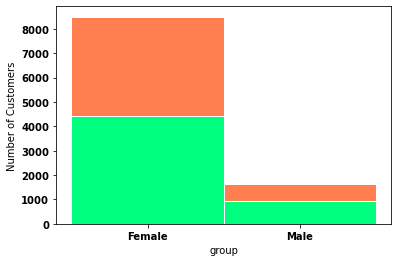

In [47]:
from matplotlib import rc
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = female["Attrition_Flag"].value_counts()
bars2 = male["Attrition_Flag"].value_counts()
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Female','Male']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='springgreen', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='coral', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.ylabel("Number of Customers")
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic

plt.show()

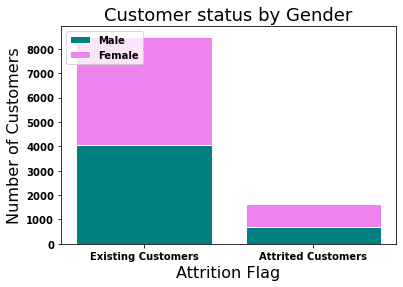

In [73]:
femaleplot = female["Attrition_Flag"].value_counts()
maleplot = male["Attrition_Flag"].value_counts()
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1]

plt.bar(r, maleplot,color='teal',edgecolor='white')
plt.bar(r, femaleplot,color='violet',edgecolor='white',bottom=maleplot)

names = ['Existing Customers','Attrited Customers']
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Attrition Flag', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by Gender",fontsize=18)
plt.legend(Gender,loc=2)
plt.show()

In [77]:
card_df

,Gender,Attrition_Flag,Customer_Age
0,M,Existing Customer,45
1,F,Existing Customer,49
2,M,Existing Customer,51
3,F,Existing Customer,40
4,M,Existing Customer,40
...,...,...,...
10122,M,Existing Customer,50
10123,M,Attrited Customer,41
10124,F,Attrited Customer,44
10125,M,Attrited Customer,30


In [94]:
# create bins for ages, separate by gender again. Try and visualise in pie chart

#card_df["Customer_Age"].max()
#use this to determine max age is 73
#card_df["Customer_Age"].min()
#use this to determine min age is 26

bins = [20, 29, 39, 49, 59, 69, 79]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

new_card_df = card_df["Age groups"] = pd.cut(card_df["Customer_Age"], bins, labels=labels)



C:\Users\elsmi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [105]:
merged_df = pd.merge(card_df, new_card_df, how="left", on="Customer_Age")
merged_df

,Gender,Attrition_Flag,Customer_Age,Age groups
0,M,Existing Customer,45,40-49
1,F,Existing Customer,49,40-49
2,M,Existing Customer,51,50-59
3,F,Existing Customer,40,40-49
4,M,Existing Customer,40,40-49
...,...,...,...,...
10122,M,Existing Customer,50,50-59
10123,M,Attrited Customer,41,40-49
10124,F,Attrited Customer,44,40-49
10125,M,Attrited Customer,30,30-39


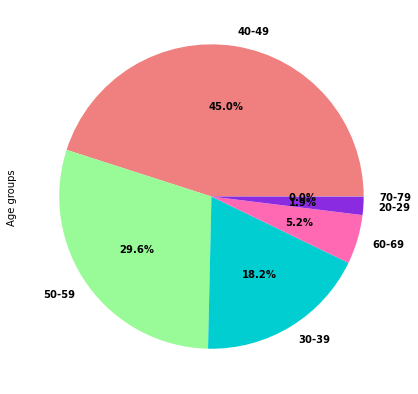

In [126]:
pieplot = merged_df["Age groups"].value_counts().plot(kind="pie", y="Age groups", autopct="%1.1f%%", colors=["lightcoral", "palegreen", "darkturquoise", "hotpink", "blueviolet", "cornflowerblue"], figsize=(7,7))



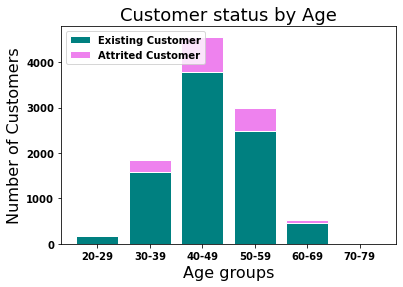

In [166]:
att_cust = merged_df.loc[card_df["Attrition_Flag"] == "Attrited Customer"]
exist_cust = merged_df.loc[card_df["Attrition_Flag"] == "Existing Customer"]


attplot = att_cust["Age groups"].value_counts().sort_index(ascending=True)
existplot = exist_cust["Age groups"].value_counts().sort_index(ascending=True)
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1,2,3,4,5]

plt.bar(r, existplot,color='teal',edgecolor='white')
plt.bar(r, attplot,color='violet',edgecolor='white',bottom=existplot)

names = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Age groups', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by Age",fontsize=18)
plt.legend(att_flag,loc=2)
plt.show()

In [164]:
merged_df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64